In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sunpy
from sunpy.visualization.colormaps import cm
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image

#HACK to import a function from a file that is not in a package
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, './datasets/machine-learning-dataset-for-sdo')
from data_loader import get_dataset

#Channels that correspond to HMI Magnetograms 
HMI_WL = ['bx','by','bz']
#A colormap for visualizing HMI
HMI_CM = LinearSegmentedColormap.from_list("bwrblack", ["#0000ff","#000000","#ff0000"])

def channelNameToMap(name):
    """Given channel name, return colormap"""
    return HMI_CM if name in HMI_WL else cm.cmlist.get('sdoaia%d' % int(name))

def getClip(X,name):
    """Given an image and the channel name, get the right clip"""
    return getSignedPctClip(X) if name in HMI_WL else getPctClip(X)

def getPctClip(X):
    """Return the 99.99th percentile"""
    return (0,np.quantile(X.ravel(),0.999))

def getSignedPctClip(X):
    """Return the 99.99th percentile by magnitude, but symmetrize it so 0 is in the middle"""
    v = np.quantile(np.abs(X.ravel()),0.999)
    return (-v,v)

def vis(X, cm, clip):
    """Given image, colormap, and a clipping, visualize results"""
    Xc = np.clip((X-clip[0])/(clip[1]-clip[0]),0,1)
    Xcv = cm(Xc)
    return (Xcv[:,:,:3]*255).astype(np.uint8)

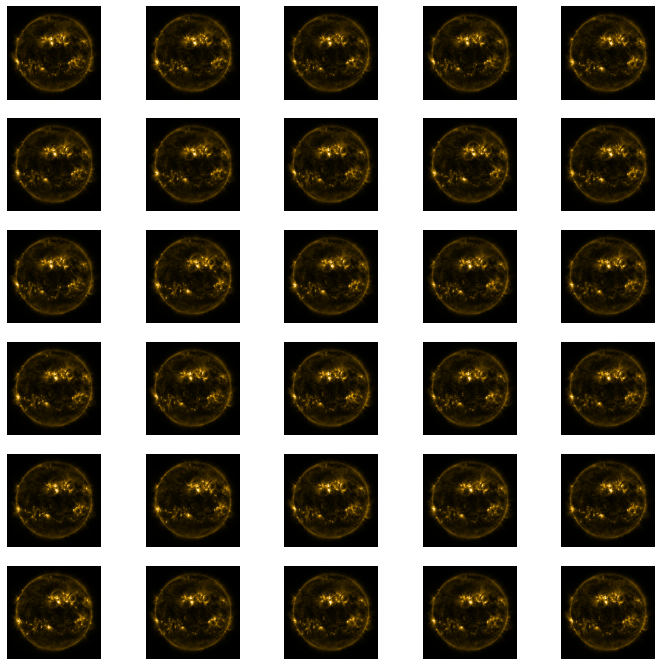

In [14]:
train_loader = get_dataset(
            base_dir="/Users/mariusgiger/repos/master/test-sdo-ml-dataset-ae/extract",
            num_processes=0,
            pin_memory=False,
            batch_size=32,
            do_reshuffle=False,
            mode="train",
            file_pattern="**/*.npz",
            target_size=512,
)


for batch_idx, data in enumerate(train_loader):
    X, _ = data
    _, axs = plt.subplots(6, 5, figsize=(12, 12))
    axs = axs.flatten()
    for x, ax in zip(X, axs):
        img = x[0] #skip the channel information
        V = vis(img, channelNameToMap(171), getClip(img, 171))
        ax.imshow(V)
        ax.axis('off')
    break